-667.373
-608.375
Algorithm      Average Reward
-----------  ----------------
SARSA                -667.373
Q-learning           -608.375
SARSA algorithm
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

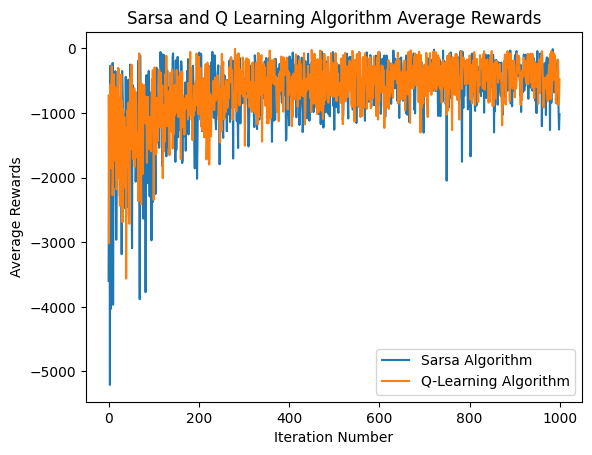

In [15]:
"""This uses Taxi-v3 environment from OpenAI gym and runs SARSA and Q Learning algorithm on it for various starting states to get the average reward."""

import random
import numpy as np
import matplotlib.pyplot as plt
import gym
from tabulate import tabulate

# Connecting to OpenAI
env = gym.make('Taxi-v3')

# Epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

def sarsa(alpha, gamma, epsilon): 
    rewards = []
    # Initializing Q arbitarrialy.
    for i in range(env.observation_space.n):
        for j in range(env.action_space.n):
            Q[i, j] = round(random.random(),1)
    

    # Running algorithm till convergence.
    for i in range(1000):
        sum = 0
        # Initializing s.
        
        s = env.reset()[0]
        
        # Taking actiona, observing r and s'.
        a = epsilon_greedy(s, epsilon)
        tuple = env.step(a)
        next_s = tuple[0]
        R = tuple[1]
        done = tuple[2]
        # Repeating episodes until s is terminal
        while not done:
            sum+=R
            
            next_a = epsilon_greedy(next_s, epsilon)# Greedy choice of next action.

            #Updating Q. Removing assignment part since that can cause values of the policy to become significantly large.
            Q[s, a] += Q[s, a] + alpha * (R + gamma * Q[next_s, next_a] - Q[s, a])

            # Setting next state and action to current.
            s = next_s
            a = next_a

            # Taking action a, observing r and s'
            tuple = env.step(a)
            next_s = tuple[0]
            R = tuple[1]
            done = tuple[2]
        rewards.append(sum)    
    return rewards 
        
def q_learning(alpha, gamma, epsilon):
    rewards = []
    # Initializing Q arbitarrialy.
    for i in range(env.observation_space.n):
        for j in range(env.action_space.n):
            Q[i, j] = round(random.random(),1)

    # Running algorithm till convergence.
    for i in range(1000):
        sum = 0
        # Initializing s.
        s = env.reset()[0]

        # Taking actiona, observing r and s'.
        a = epsilon_greedy(s, epsilon)
        tuple = env.step(a)
        next_s = tuple[0]
        R = tuple[1]
        done = tuple[2]
        # Repeating episodes until s is terminal
        while not done:
            sum+=R
            #Updating Q. Removing assignment part since that can cause values of the policy to become significantly large.
            Q[s, a] += Q[s, a] + alpha * (R + gamma * np.max(Q[next_s]) - Q[s, a])
            # Setting next state to current
            s = next_s

            # Taking actiona, observing r and s'.
            a = epsilon_greedy(s, epsilon)
            tuple = env.step(a)
            next_s = tuple[0]
            R = tuple[1]
            done = tuple[2]
            
        rewards.append(sum)

    return rewards 

alpha = 0.9
gamma = 0.5
epsilon = 0.1
sarsa_average_rewards = []
q_learning_average_rewards = []
sarsa_average = 0
q_learning_average = []
episodes = [i for i in range(1000)]

# Initializing Q arbitarrialy.
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Running Sarsa
sarsa_average_rewards = sarsa(alpha, gamma, epsilon)
sarsa_average = np.mean(sarsa_average_rewards)

# Running Q Learning
Q = np.zeros((env.observation_space.n, env.action_space.n))
q_learning_average_rewards = q_learning(alpha, gamma, epsilon)
q_learning_average = np.mean(q_learning_average_rewards)

# Displaying Data.
print(sarsa_average)
print(q_learning_average)
plt.title("Sarsa and Q Learning Algorithm Average Rewards")
plt.xlabel("Iteration Number")
plt.ylabel("Average Rewards")
plt.plot(episodes, sarsa_average_rewards, label='Sarsa Algorithm')
plt.plot(episodes, q_learning_average_rewards, label='Q-Learning Algorithm')
plt.legend()
plt.savefig("plot2.png")

table = [["SARSA", sarsa_average],
         ["Q-learning", q_learning_average]]

print(tabulate(table, headers=["Algorithm", "Average Reward"]))

table = [("SARSA", [episodes, sarsa_average_rewards]),
         ("Q-learning", [episodes,q_learning_average_rewards])]

for algorithm, data in table:
    print(f"{algorithm} algorithm")
    print(tabulate(data, headers=["Episode", "Average Reward"]))
    print()
